# Linear Transformations - Lab

## Introduction

In this lab, you'll practice your linear transformation skills!

## Objectives

You will be able to:

* Determine if a linear transformation would be useful for a specific model or set of data
* Identify an appropriate linear transformation technique for a specific model or set of data
* Apply linear transformations to independent and dependent variables in linear regression
* Interpret the coefficients of variables that have been transformed using a linear transformation

## Ames Housing Data

Let's look at the Ames Housing data, where each record represents a home sale:

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
print(plt.style.available)
plt.style.use('seaborn-dark-palette')
ames = pd.read_csv('ames.csv', index_col=0)
ames

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


We'll use this subset of features. These are specifically the _continuous numeric_ variables, which means that we'll hopefully have meaningful mean values.

From the data dictionary (`data_description.txt`):

```
LotArea: Lot size in square feet

MasVnrArea: Masonry veneer area in square feet

TotalBsmtSF: Total square feet of basement area

GrLivArea: Above grade (ground) living area square feet

GarageArea: Size of garage in square feet
```

In [62]:
ames = ames[[
    "LotArea",
    "MasVnrArea",
    "TotalBsmtSF",
    "GrLivArea",
    "GarageArea",
    "SalePrice"
]].copy()
ames

,LotArea,MasVnrArea,TotalBsmtSF,GrLivArea,GarageArea,SalePrice
Id,,,,,,
1,8450,196.0,856,1710,548,208500
2,9600,0.0,1262,1262,460,181500
3,11250,162.0,920,1786,608,223500
4,9550,0.0,756,1717,642,140000
5,14260,350.0,1145,2198,836,250000
...,...,...,...,...,...,...
1456,7917,0.0,953,1647,460,175000
1457,13175,119.0,1542,2073,500,210000
1458,9042,0.0,1152,2340,252,266500


We'll also drop any records with missing values for any of these features:

In [63]:
ames.dropna(inplace=True)
ames

,LotArea,MasVnrArea,TotalBsmtSF,GrLivArea,GarageArea,SalePrice
Id,,,,,,
1,8450,196.0,856,1710,548,208500
2,9600,0.0,1262,1262,460,181500
3,11250,162.0,920,1786,608,223500
4,9550,0.0,756,1717,642,140000
5,14260,350.0,1145,2198,836,250000
...,...,...,...,...,...,...
1456,7917,0.0,953,1647,460,175000
1457,13175,119.0,1542,2073,500,210000
1458,9042,0.0,1152,2340,252,266500


And plot the distributions of the un-transformed variables:

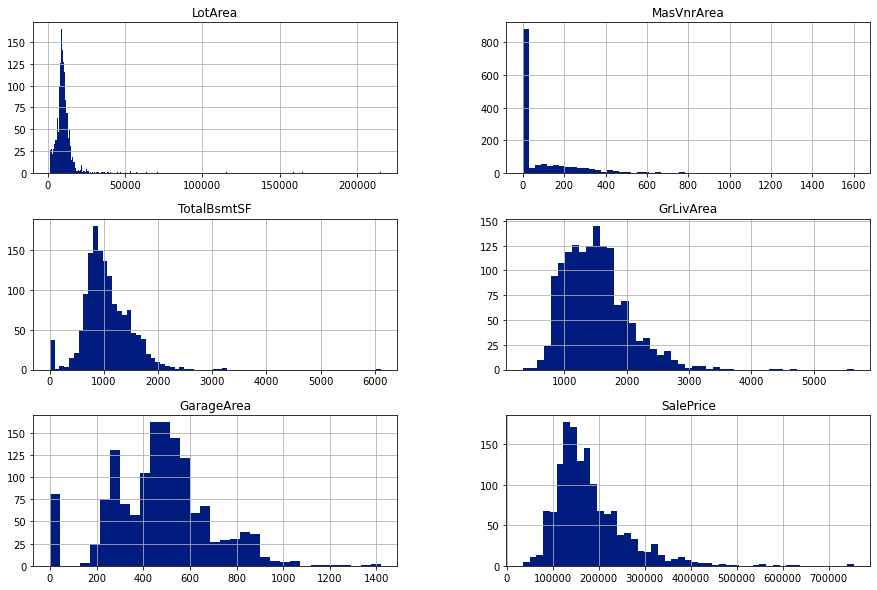

In [64]:
ames.hist(figsize=(15,10), bins="auto");

## Step 1: Build an Initial Linear Regression Model

`SalePrice` should be the target, and all other columns in `ames` should be predictors.

In [65]:
# Your code here - build a linear regression model with un-transformed features

In [66]:
# Since SalePrice is the target we can drop the SalePrice column from our subset and set Sale Price as y
y =  ames["SalePrice"]
X = ames.drop("SalePrice", axis=1)

In [67]:
# Create our model 
import statsmodels.api as sm

initial_model = sm.OLS(endog=y, exog=sm.add_constant(X))
initial_results = initial_model.fit()

In [68]:
# Print our Results 
print(initial_results.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.675
Method:                 Least Squares   F-statistic:                     603.0
Date:                Fri, 14 Jul 2023   Prob (F-statistic):               0.00
Time:                        15:49:03   Log-Likelihood:                -17622.
No. Observations:                1452   AIC:                         3.526e+04
Df Residuals:                    1446   BIC:                         3.529e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.525e+04   4145.934     -3.677      

## Step 2: Evaluate Initial Model and Interpret Coefficients

Describe the model performance overall and interpret the meaning of each predictor coefficient. Make sure to refer to the explanations of what each feature means from the data dictionary!

In [69]:
# The model is statistically significant and explains about 68% of the variance in Sale Price.

# All the coefficients are statistically significant

# Lot Area: For each additional square foot of lot area the price inccreases by about $0.26
# MasVnrArea: For each additional square foot of Masonry veneer area the price inccreases by about $55.00
# TotalBsmtSF: For each additional square foot of Basement Area the price inccreases by about $44.00
# GrLivArea: For each additional square foot of Above grade (ground) living area the price inccreases by about $64.00
# GarageArea: For each additional square foot of Garage Area the price inccreases by about $93.00

<details>
    <summary style="cursor: pointer"><b>Answer (click to reveal)</b></summary>

The model overall is statistically significant and explains about 68% of the variance in sale price.

The coefficients are all statistically significant.

* `LotArea`: for each additional square foot of lot area, the price increases by about \\$0.26
* `MasVnrArea`: for each additional square foot of masonry veneer, the price increases by about \\$55
* `TotalBsmtSF`: for each additional square foot of basement area, the price increases by about \\$44
* `GrLivArea`: for each additional square foot of above-grade living area, the price increases by about \\$64
* `GarageArea`: for each additional square foot of garage area, the price increases by about \\$93

</details>

## Step 3: Express Model Coefficients in Metric Units

Your stakeholder gets back to you and says this is great, but they are interested in metric units.

Specifically they would like to measure area in square meters rather than square feet.

Report the same coefficients, except using square meters. You can do this by building a new model, or by transforming just the coefficients.

The conversion you can use is **1 square foot = 0.092903 square meters**.

In [70]:
# Your code here - building a new model or transforming coefficients
# from initial model so that they are in square meters

# Make a copy of model
X_metric = X.copy()

# All of the features are measured in square feet, so apply the same transformation to all columns
for column in X_metric.columns:
    X_metric[column] = X_metric[column] * 0.092903 

# One of the features has "SF" in it which is no longer accurate
X_metric.rename(columns={"TotalBsmtSF": "TotalBsmtArea"}, inplace=True)

X_metric

,LotArea,MasVnrArea,TotalBsmtArea,GrLivArea,GarageArea
Id,,,,,
1,785.030350,18.208988,79.524968,158.864130,50.910844
2,891.868800,0.000000,117.243586,117.243586,42.735380
3,1045.158750,15.050286,85.470760,165.924758,56.485024
4,887.223650,0.000000,70.234668,159.514451,59.643726
5,1324.796780,32.516050,106.373935,204.200794,77.666908
...,...,...,...,...,...
1456,735.513051,0.000000,88.536559,153.011241,42.735380
1457,1223.997025,11.055457,143.256426,192.587919,46.451500
1458,840.028926,0.000000,107.024256,217.393020,23.411556


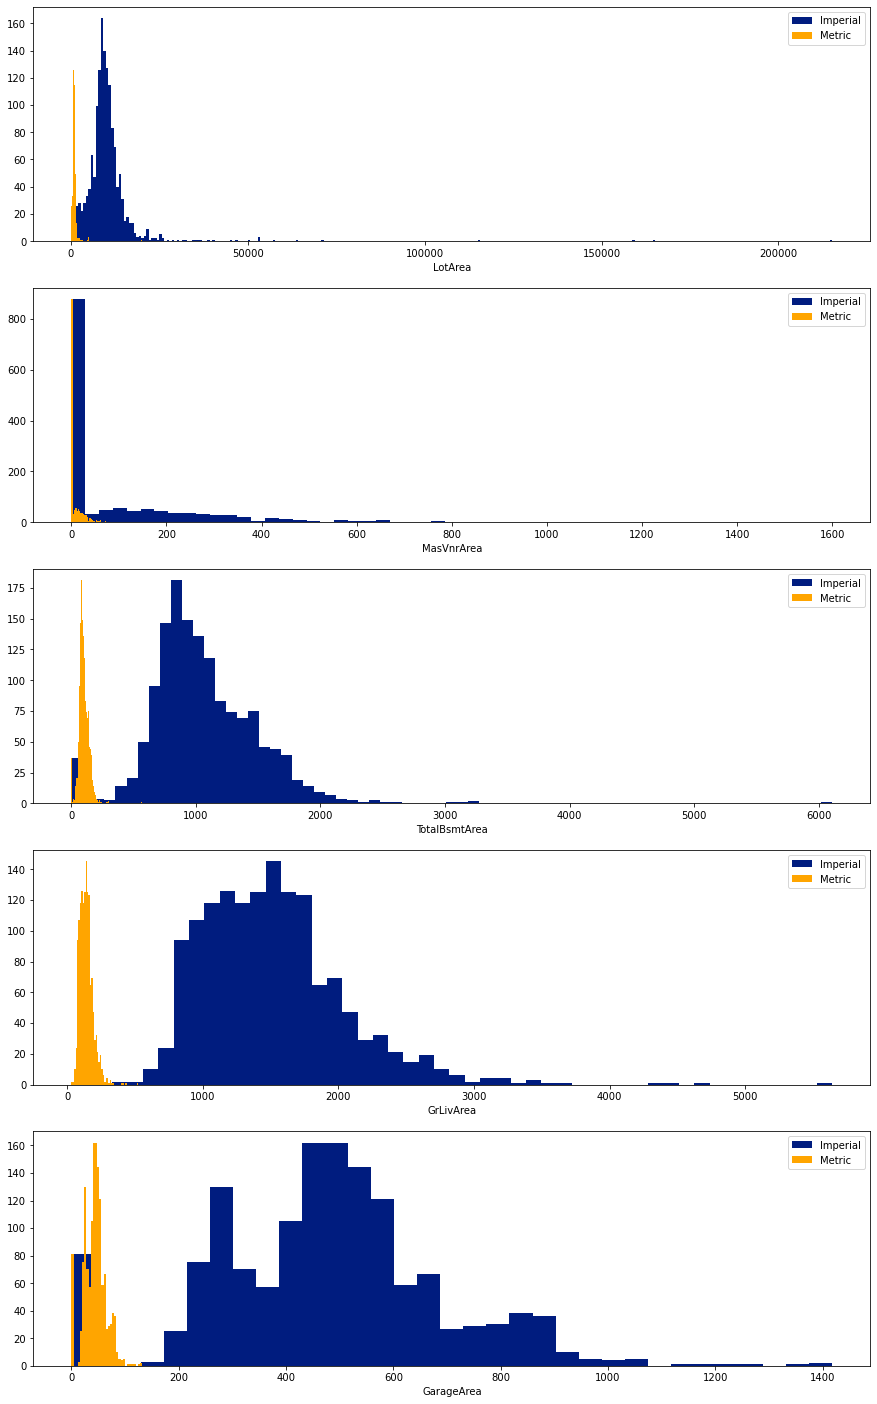

In [71]:
fig, axes = plt.subplots(nrows=5, figsize=(15, 25))

for index, col in enumerate(X):
    ax = axes[index]
    ax.hist(X[col], bins="auto", label="Imperial")
    if col == "TotalBsmtSF":
        col = "TotalBsmtArea"
    ax.hist(X_metric[col], bins="auto", label="Metric", color="orange")
    ax.set_xlabel(col)
    ax.legend()

In [72]:
metric_model = sm.OLS(y, sm.add_constant(X_metric))
metric_results = metric_model.fit()

metric_results.params

const           -15246.083611
LotArea              2.763844
MasVnrArea         592.532631
TotalBsmtArea      475.377849
GrLivArea          687.214850
GarageArea        1006.027003
dtype: float64

<details>
    <summary style="cursor: pointer"><b>Answer (click to reveal)</b></summary>

* `LotArea`: for each additional square meter of lot area, the price increases by about \\$2.76
* `MasVnrArea`: for each additional square meter of masonry veneer, the price increases by about \\$593
* `TotalBsmtArea`: for each additional square meter of basement area, the price increases by about \\$475
* `GrLivArea`: for each additional square meter of above-grade living area, the price increases by about \\$687
* `GarageArea`: for each additional square meter of garage area, the price increases by about \\$1,006

</details>

## Step 4: Center Data to Provide an Interpretable Intercept

Your stakeholder is happy with the metric results, but now they want to know what's happening with the intercept value. Negative \\$17k for a home with zeros across the board...what does that mean?

Center the data so that the mean is 0, fit a new model, and report on the new intercept.

(It doesn't matter whether you use data that was scaled to metric units or not. The intercept should be the same either way.)

In [73]:
# Your code here - center data
X_centered = X_metric.copy()

for col in X_centered.columns:
    X_centered[col] = X_centered[col] - X_centered[col].mean()
X_centered.describe()

,LotArea,MasVnrArea,TotalBsmtArea,GrLivArea,GarageArea
count,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03
mean,5.512089e-14,7.829672e-16,-2.662088e-15,3.719094e-15,-1.957418e-15
std,9.280604e+02,1.682159e+01,4.070258e+01,4.883240e+01,1.989113e+01
min,-8.553836e+02,-9.632672e+00,-9.809136e+01,-1.096340e+02,-4.389436e+01
25%,-2.757850e+02,-9.632672e+00,-2.425670e+01,-3.586907e+01,-1.344541e+01
50%,-9.557639e+01,-9.632672e+00,-6.070942e+00,-4.885917e+00,5.132699e-01
75%,1.015173e+02,5.789226e+00,2.242705e+01,2.433208e+01,9.617764e+00
max,1.902075e+04,1.390121e+02,4.695460e+02,3.834951e+02,8.784209e+01


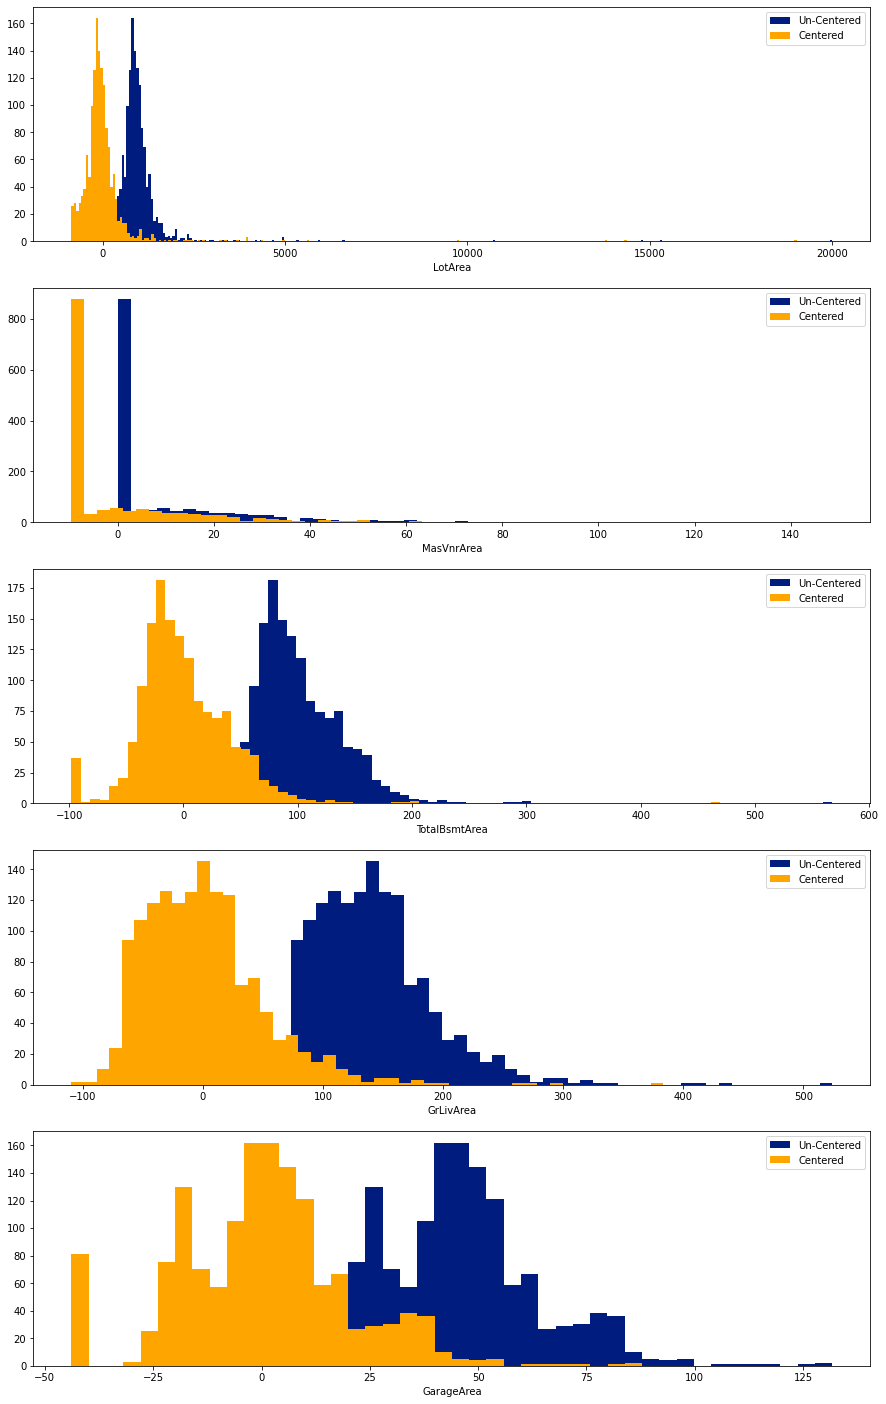

In [74]:
fig, axes = plt.subplots(nrows=5, figsize=(15, 25))

for index, col in enumerate(X_metric):
    ax = axes[index]
    ax.hist(X_metric[col], bins="auto", label="Un-Centered")
    ax.hist(X_centered[col], bins="auto", label="Centered", color="orange")
    ax.set_xlabel(col)
    ax.legend()

In [75]:
# Your code here - build a new model
centered_model = sm.OLS(y, sm.add_constant(X_centered))
centered_results = centered_model.fit()

In [76]:
print(centered_results.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.675
Method:                 Least Squares   F-statistic:                     603.0
Date:                Fri, 14 Jul 2023   Prob (F-statistic):               0.00
Time:                        15:49:06   Log-Likelihood:                -17622.
No. Observations:                1452   AIC:                         3.526e+04
Df Residuals:                    1446   BIC:                         3.529e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.806e+05   1186.695    152.200

In [77]:
initial_results.params

const         -15246.083611
LotArea            0.256769
MasVnrArea        55.048059
TotalBsmtSF       44.164028
GrLivArea         63.844321
GarageArea        93.462927
dtype: float64

In [78]:
centered_results.params

const            180615.063361
LotArea               2.763844
MasVnrArea          592.532631
TotalBsmtArea       475.377849
GrLivArea           687.214850
GarageArea         1006.027003
dtype: float64

In [79]:
# Your written answer here - interpret the new intercept
"""
The new intercept is about $181k. This suggests that a home with an average lot area, 
average masonry veneer area, average basement area, average above grade living area,
and average garage area would sell for about $181k.  
"""

'\nThe new intercept is about $181k. This suggests that a home with an average lot area, \naverage masonry veneer area, average basement area, average above grade living area,\nand average garage area would sell for about $181k.  \n'

<details>
    <summary style="cursor: pointer"><b>Answer (click to reveal)</b></summary>

The new intercept is about \\$181k. This means that a home with average lot area, average masonry veneer area, average total basement area, average above-grade living area, and average garage area would sell for about \\$181k.

</details>

## Step 5: Identify the "Most Important" Feature

Finally, either build a new model with transformed coefficients or transform the coefficients from the Step 4 model so that the most important feature can be identified.

Even though all of the features are measured in area, they are different kinds of area (e.g. lot area vs. masonry veneer area) that are not directly comparable as-is. So apply **standardization** (dividing predictors by their standard deviations) and identify the feature with the highest standardized coefficient as the "most important".

In [80]:
# Your code here - building a new model or transforming coefficients
# from centered model so that they are in standard deviations

X_standardized = X_centered.copy()

for col in X_standardized:
    X_standardized[col] = (X_standardized[col] - X_standardized[col].mean()) / X_standardized[col].std()

X_standardized.describe()

,LotArea,MasVnrArea,TotalBsmtArea,GrLivArea,GarageArea
count,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03,1.452000e+03
mean,4.893545e-18,4.404191e-17,-1.468064e-17,-9.787090e-18,-7.340318e-18
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-9.216895e-01,-5.726373e-01,-2.409955e+00,-2.245109e+00,-2.206731e+00
25%,-2.971627e-01,-5.726373e-01,-5.959501e-01,-7.345343e-01,-6.759499e-01
50%,-1.029851e-01,-5.726373e-01,-1.491538e-01,-1.000548e-01,2.580396e-02
75%,1.093865e-01,3.441544e-01,5.509983e-01,4.982773e-01,4.835203e-01
max,2.049516e+01,8.263909e+00,1.153603e+01,7.853292e+00,4.416145e+00


In [81]:
# Create standardized model 
standardized_model = sm.OLS(y, sm.add_constant(X_standardized))
standardized_results = standardized_model.fit()

In [82]:
# print standardized results
print(standardized_results.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.675
Method:                 Least Squares   F-statistic:                     603.0
Date:                Fri, 14 Jul 2023   Prob (F-statistic):               0.00
Time:                        15:49:06   Log-Likelihood:                -17622.
No. Observations:                1452   AIC:                         3.526e+04
Df Residuals:                    1446   BIC:                         3.529e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.806e+05   1186.695    152.200

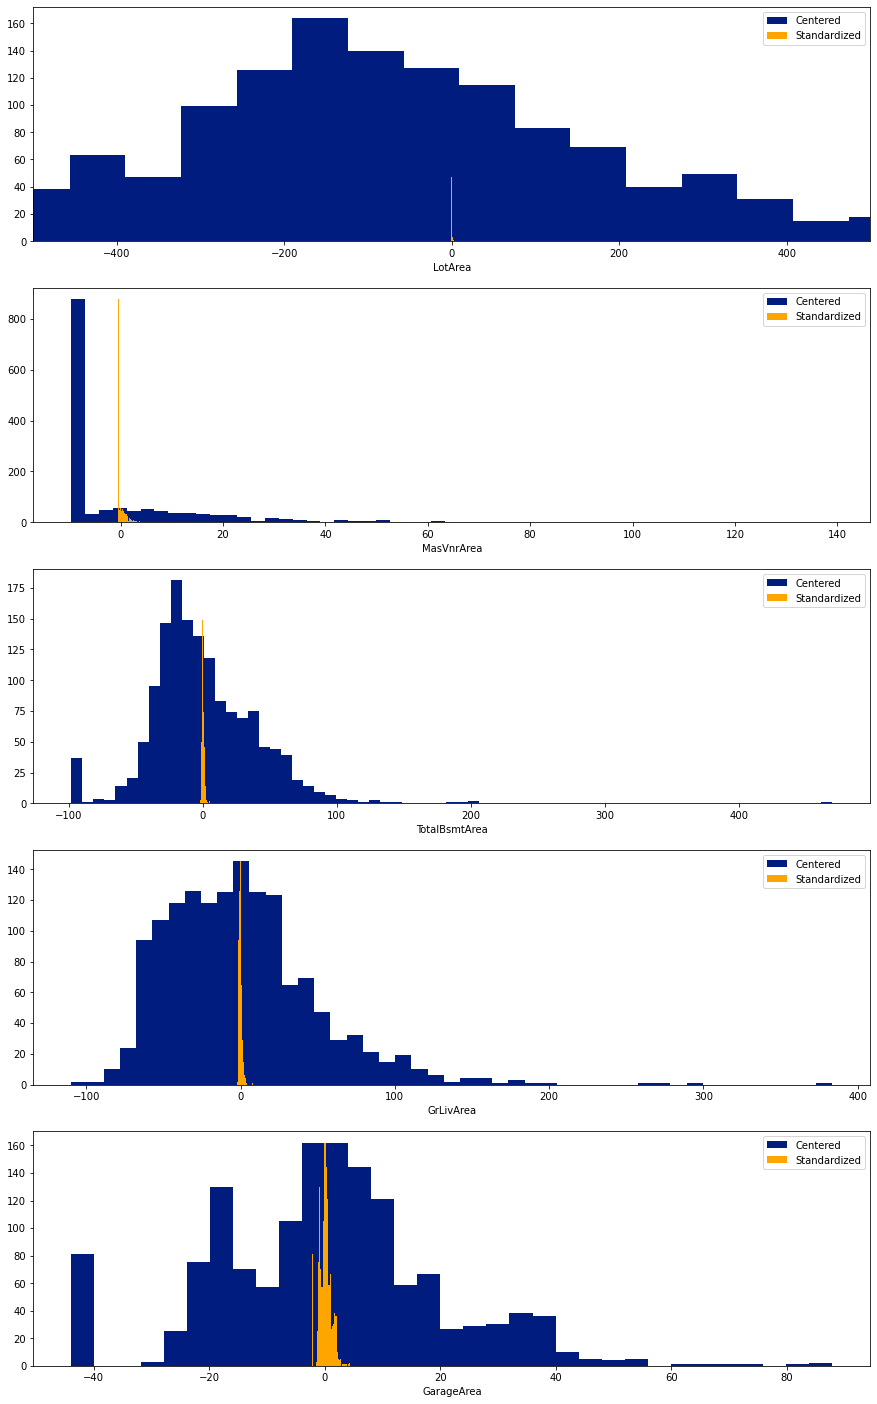

In [83]:
fig, axes = plt.subplots(nrows=5, figsize=(15, 25))

for index, col in enumerate(X_standardized):
    ax = axes[index]
    ax.hist(X_centered[col], bins="auto", label="Centered")
    ax.hist(X_standardized[col], bins="auto", label="Standardized", color="orange")
    ax.set_xlabel(col)
    ax.legend()
    
# Manually adjust LotArea axis because otherwise standardized data is invisible
# (LotArea has a large standard deviation)
axes[0].set_xlim(-500, 500);

In [84]:
standardized_model = sm.OLS(y, sm.add_constant(X_standardized))
standardized_results = standardized_model.fit()

standardized_results.params

const            180615.063361
LotArea            2565.014370
MasVnrArea         9967.343227
TotalBsmtArea     19349.103860
GrLivArea         33558.347891
GarageArea        20011.010509
dtype: float64

In [85]:
# Your written answer here - identify the "most important" feature
"""
The feature with the highest standardized coefficient is GrLivArea. 
This means that this feature is most important. 
"""

'\nThe feature with the highest standardized coefficient is GrLivArea. \nThis means that this feature is most important. \n'

<details>
    <summary style="cursor: pointer"><b>Answer (click to reveal)</b></summary>

The feature with the highest standardized coefficient is `GrLivArea`. This means that above-grade living area is most important.

</details>

## Summary
Great! You've now got some hands-on practice transforming data and interpreting the results!